# Data Processing

In [127]:
! python mkt_data_processing.py

Processed data saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4/train.csv
Processed data saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4/test.csv


In [1]:
import sys
from pathlib import Path
from train import train_model, hyper_parameter_tuning
from neural_network_trainer import NeuralNetworkTrainer
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

# ML Hyper-parameter tuning

In [1]:
param_grids = {
        "knn": {
            "n_neighbors": [3, 5, 7, 9]
        },
        "svm": {
            "kernel": ["rbf"],
            "C": [0.1, 1, 10],
            "gamma": ["scale", "auto", 0.2, 0.8]
        },
        "xgboost": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 6, 9]
        }
    }

In [ ]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 

config_path = project_root / "configs" / "xgboost.yaml"
hyper_parameter_tuning(config_path, param_grids, "grid")

# ML Training

In [58]:
project_root = Path.cwd().parent
sys.path.append(str(project_root))

config_path = project_root / "configs" / "xgboost.yaml"
train_model(config_path)

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4\test.csv...
Initializing the xgboost model...
Training the model...
Evaluating the model...
XGBOOST Model Accuracy: 0.8839285714285714
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       379
           1       0.74      0.38      0.50        69

    accuracy                           0.88       448
   macro avg       0.82      0.68      0.72       448
weighted avg       0.87      0.88      0.87       448

XGBOOST F1 Score: 0.5
Evaluation results saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\results\xgboost_results.json
XGBOOST Model saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\model_checkpoints\xgboost_model.pkl


# ML Debug

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4\test.csv...
Initializing the xgboost model...


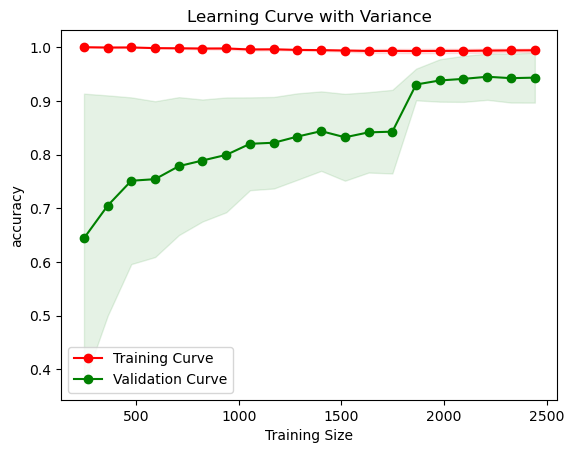

In [53]:
project_root = Path.cwd().parent
sys.path.append(str(project_root))

config_path = project_root / "configs" / "xgboost.yaml"
train_model(config_path, debug=True)

# Validation Curve

In [54]:
param_grids = {
        # "knn": {
        #     "n_neighbors": [3, 5, 7, 9]
        # },
        # "svm": {
        #     "kernel": ["rbf"],
        #     "C": [0.1, 1, 10],
        #     "gamma": ["scale", "auto", 0.2, 0.8]
        # },
        "xgboost": {
            # "n_estimators": [50, 100, 200],
            # "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [1, 2, 3, 6, 9, 12, 15]
        }
    }

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4\test.csv...
Initializing the xgboost model for hyperparameter tuning...
Performing hyperparameter tuning...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best hyperparameters: {'max_depth': 6}
Best cross-validation accuracy: 0.9312377210216111
Retraining the model with the best hyperparameters...
Evaluating the best model on the test set...
XGBOOST Model Accuracy: 0.8660714285714286
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       379
           1       0.60      0.41      0.48        69

    accuracy                           0.87       448
   macro avg       0.75      0.68      0.70       448
weighted avg       0.85      0.87      0.86       448

XGBOOST F1 Score: 0.482758

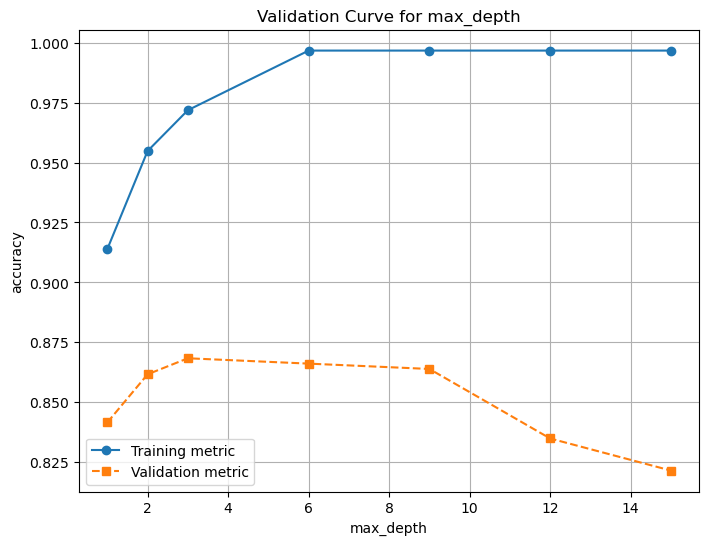

(GradientBoostingModel(max_depth=6), {'max_depth': 6}, 0.9312377210216111)

In [57]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 

config_path = project_root / "configs" / "xgboost.yaml"
hyper_parameter_tuning(config_path, param_grids, "grid", validation_curve=True, param_name="max_depth")

# Neural Network Parameter Tuning

In [12]:
param_grid = {
            "num_layers": [2, 3],
            "hidden_sizes": [64, 128, 256],
            "learning_rate": [0.001, 0.01],
            "activation": ["relu", "tanh", "sigmoid"],
            "epochs": [10, 20],
            "batch_size": [32, 64, 128]
        }

In [13]:
trainer = NeuralNetworkTrainer(config_path="C:/Meta Directory/Gatech/Machine Learning/HW/HW1/hw1_repo/configs/nn.yaml", device="cuda")
best_model, best_params = trainer.tune_hyperparameters(param_grid)

Testing params: (2, 64, 0.001, 'relu', 10, 32)
Accuracy: 0.8571
Testing params: (2, 64, 0.001, 'relu', 10, 64)
Accuracy: 0.8772
Testing params: (2, 64, 0.001, 'relu', 10, 128)
Accuracy: 0.8750
Testing params: (2, 64, 0.001, 'relu', 20, 32)
Accuracy: 0.8661
Testing params: (2, 64, 0.001, 'relu', 20, 64)
Accuracy: 0.8661
Testing params: (2, 64, 0.001, 'relu', 20, 128)
Accuracy: 0.8795
Testing params: (2, 64, 0.001, 'tanh', 10, 32)
Accuracy: 0.8638
Testing params: (2, 64, 0.001, 'tanh', 10, 64)
Accuracy: 0.8728
Testing params: (2, 64, 0.001, 'tanh', 10, 128)
Accuracy: 0.8683
Testing params: (2, 64, 0.001, 'tanh', 20, 32)
Accuracy: 0.8728
Testing params: (2, 64, 0.001, 'tanh', 20, 64)
Accuracy: 0.8661
Testing params: (2, 64, 0.001, 'tanh', 20, 128)
Accuracy: 0.8705
Testing params: (2, 64, 0.001, 'sigmoid', 10, 32)
Accuracy: 0.8661
Testing params: (2, 64, 0.001, 'sigmoid', 10, 64)
Accuracy: 0.8705
Testing params: (2, 64, 0.001, 'sigmoid', 10, 128)
Accuracy: 0.8460
Testing params: (2, 64, 0.

# Neural Network Training

In [119]:
trainer = NeuralNetworkTrainer(config_path="C:/Meta Directory/Gatech/Machine Learning/HW/HW1/hw1_repo/configs/nn.yaml", device="cuda")
trainer.train_and_evaluate()

Loading training data...
Loading test data...
Initializing model...
Training model...
Epoch 1/10, Loss: 0.5650
Epoch 2/10, Loss: 0.4176
Epoch 3/10, Loss: 0.3467
Epoch 4/10, Loss: 0.3082
Epoch 5/10, Loss: 0.2821
Epoch 6/10, Loss: 0.2639
Epoch 7/10, Loss: 0.2500
Epoch 8/10, Loss: 0.2409
Epoch 9/10, Loss: 0.2344
Epoch 10/10, Loss: 0.2277
Evaluating model...
{'0': {'f1-score': 0.9343434343434344,
       'precision': 0.8958837772397095,
       'recall': 0.9762532981530343,
       'support': 379.0},
 '1': {'f1-score': 0.5,
       'precision': 0.7428571428571429,
       'recall': 0.37681159420289856,
       'support': 69.0},
 'accuracy': 0.8839285714285714,
 'macro avg': {'f1-score': 0.7171717171717171,
               'precision': 0.8193704600484262,
               'recall': 0.6765324461779665,
               'support': 448.0},
 'weighted avg': {'f1-score': 0.8674467893217893,
                  'precision': 0.8723149429263231,
                  'recall': 0.8839285714285714,
                  

# Neural Network Debug

Loading training data...
Loading test data...
Initializing model...


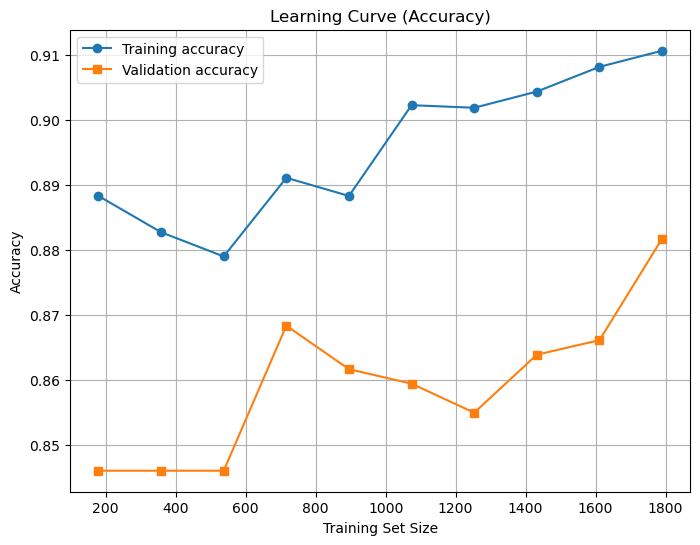

Loss curve


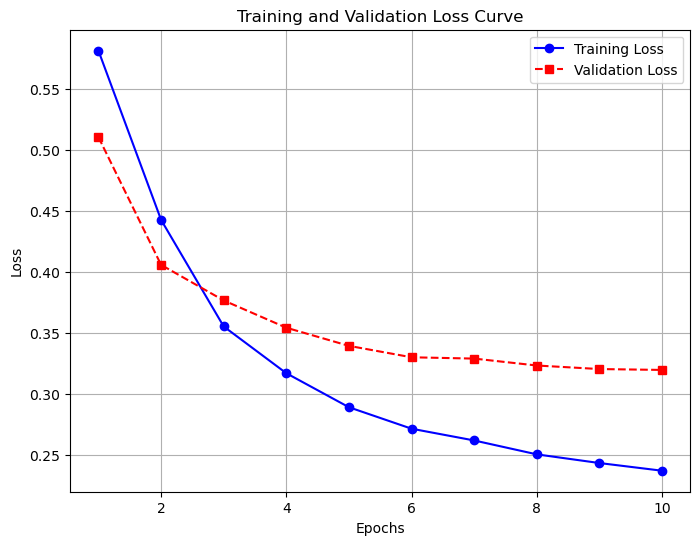

In [11]:
trainer = NeuralNetworkTrainer(config_path="C:/Meta Directory/Gatech/Machine Learning/HW/HW1/hw1_repo/configs/nn.yaml", device="cuda")
trainer.train_and_evaluate(debug=True)

# Validation Curve

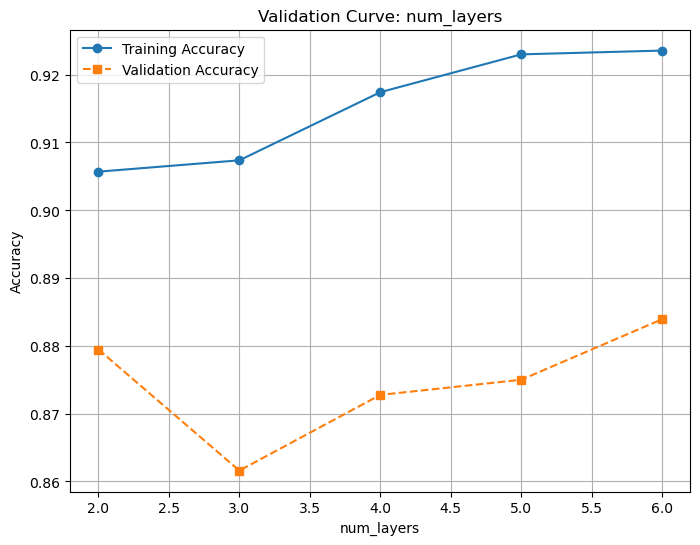

In [36]:
param_values = [2, 3, 4, 5, 6]

trainer = NeuralNetworkTrainer(config_path="C:/Meta Directory/Gatech/Machine Learning/HW/HW1/hw1_repo/configs/nn.yaml", device="cuda")
trainer.plot_validation_curve("num_layers", param_values)